# Histogram equalization
**1223800002 - Nur Rizky Romadhon**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)

First, read the image as grayscale

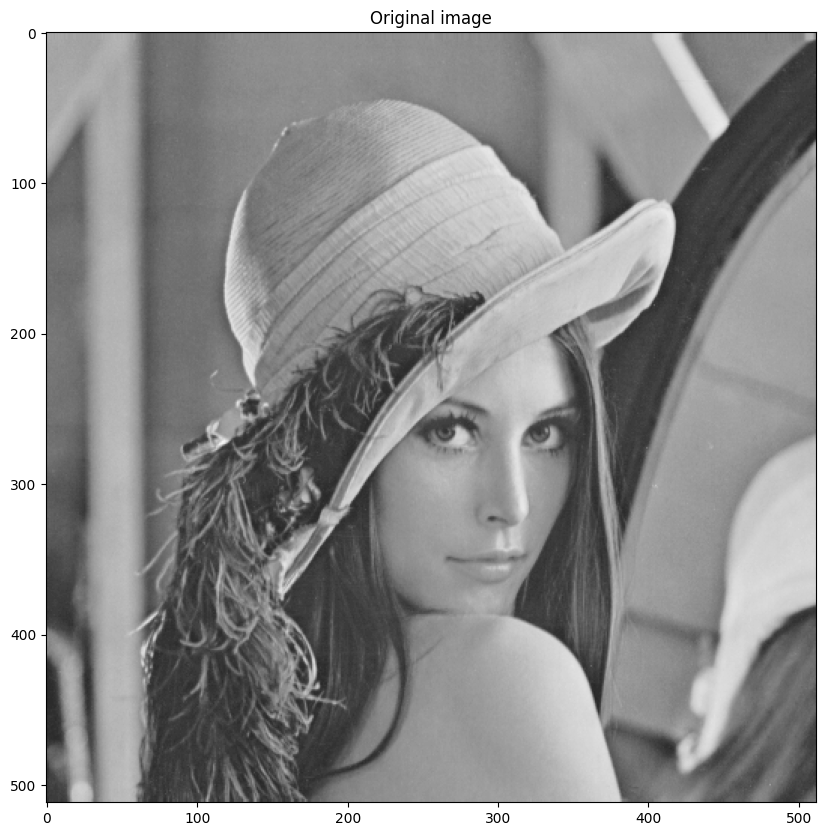

In [3]:
# read as grayscale
I = cv2.imread("Lenna.png", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

Let's start by calculating and showing the original histogram

In [4]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

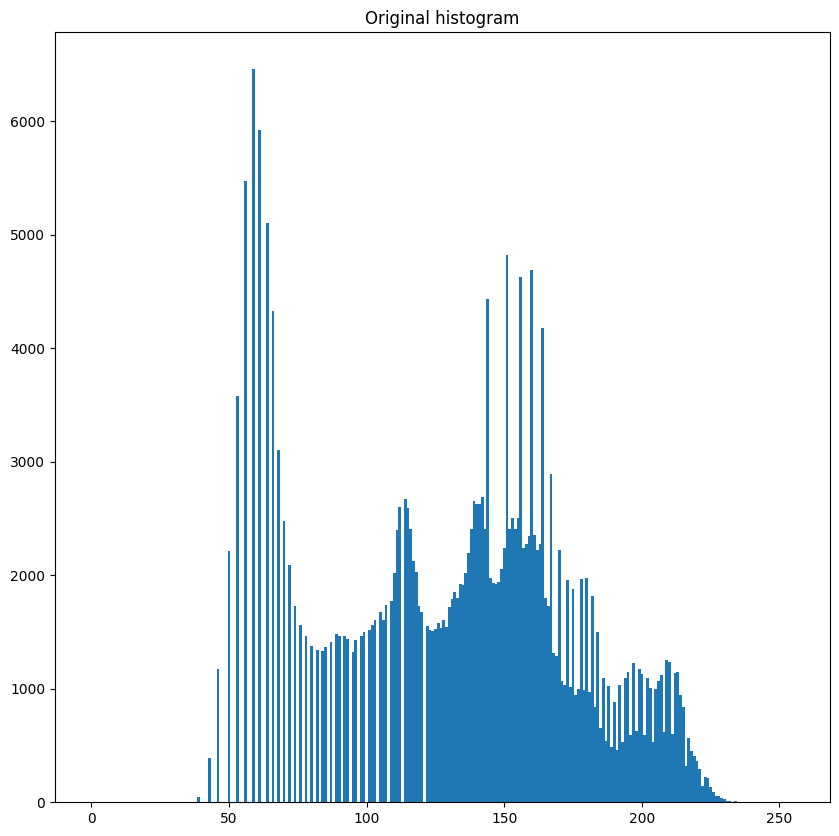

In [5]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()

Normalize the histogram to gat a discrete PDF

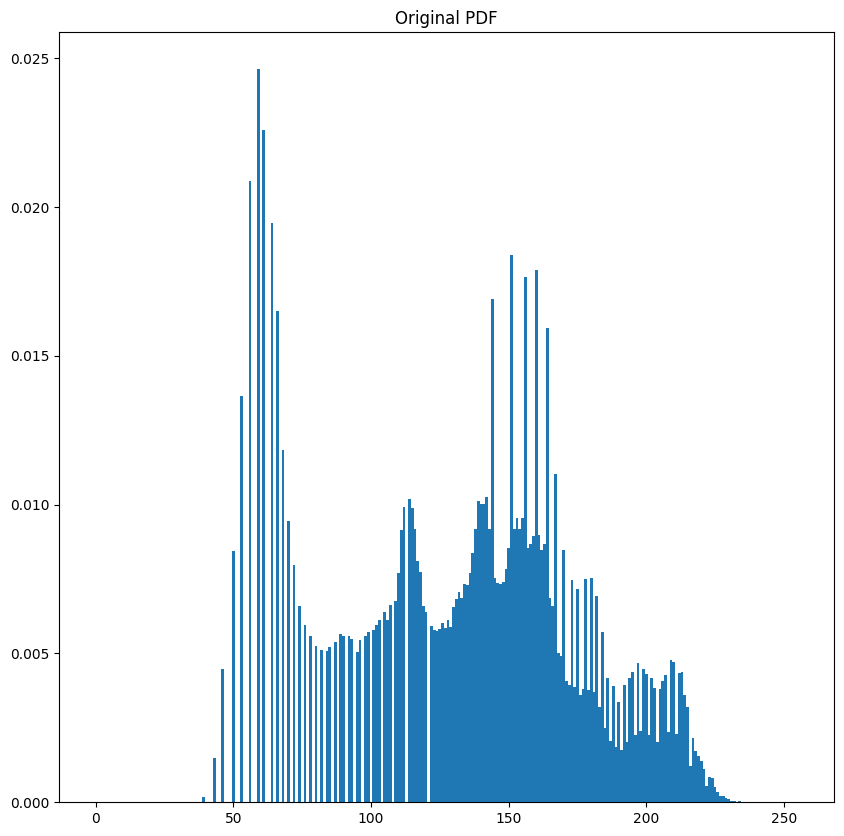

In [6]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()

Get the CDF by calculating the cumulative sum of the pdf data


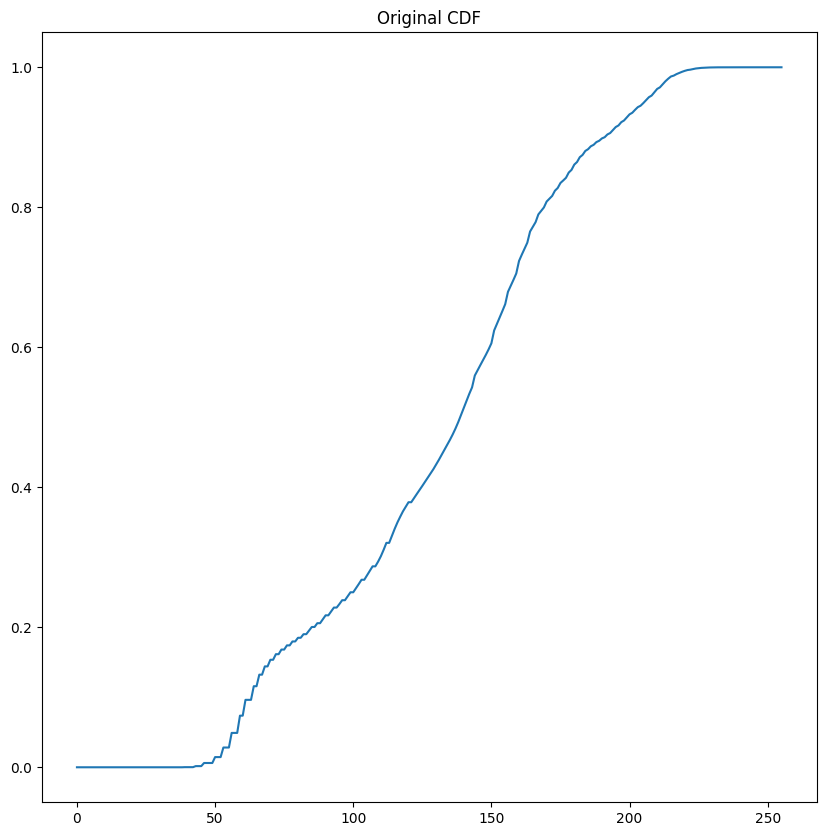

In [7]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

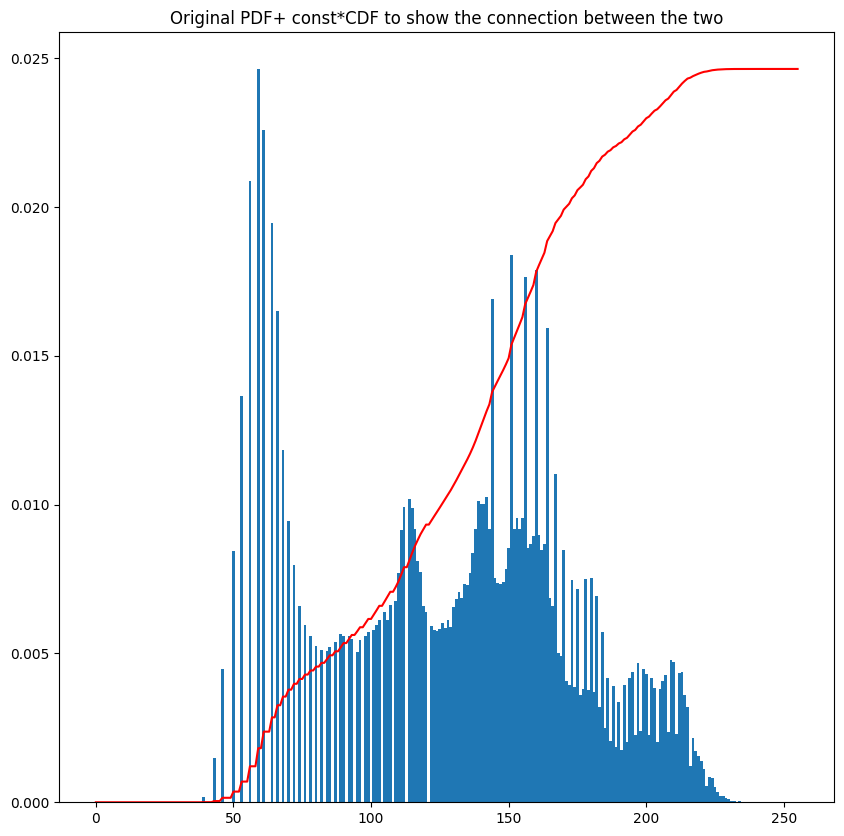

In [8]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()

The final step is to un-normalize the CDF to become the equalization function


In [9]:
f_eq = np.round(cdf * 255).astype(int)

f_eq

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   2,   2,   2,   2,   4,   4,
         4,   7,   7,   7,  13,  13,  13,  19,  19,  25,  25,  25,  30,
        30,  34,  34,  37,  37,  39,  39,  41,  41,  43,  43,  44,  44,
        46,  46,  47,  47,  48,  48,  50,  51,  51,  52,  52,  54,  55,
        55,  57,  58,  58,  59,  61,  61,  62,  64,  64,  65,  67,  68,
        68,  70,  72,  73,  73,  75,  77,  79,  82,  82,  84,  87,  89,
        91,  93,  95,  97,  97,  98, 100, 101, 103, 104, 106, 107, 109,
       110, 112, 114, 116, 117, 119, 121, 123, 126, 128, 131, 133, 136,
       138, 143, 145, 147, 148, 150, 152, 154, 159, 161, 164, 166, 169,
       173, 175, 178, 180, 184, 187, 189, 191, 195, 197, 199, 201, 203,
       204, 206, 207, 208, 210, 211, 213, 214, 215, 217, 218, 22

Use the equalization function to get the equalized image


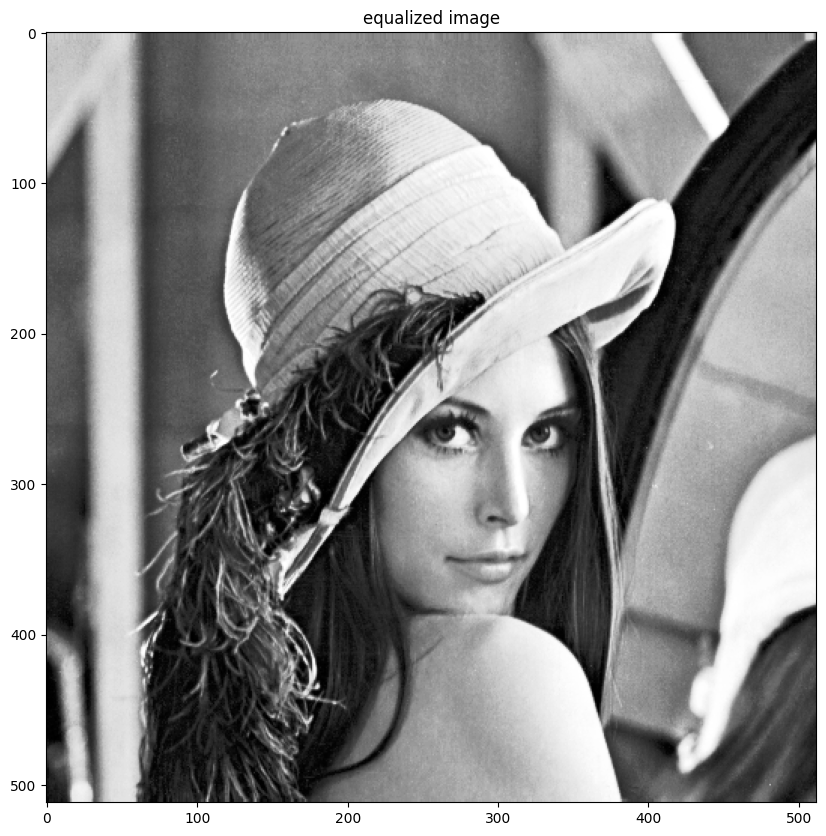

In [10]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()

Plot the equalized histogram, PDF and CDF


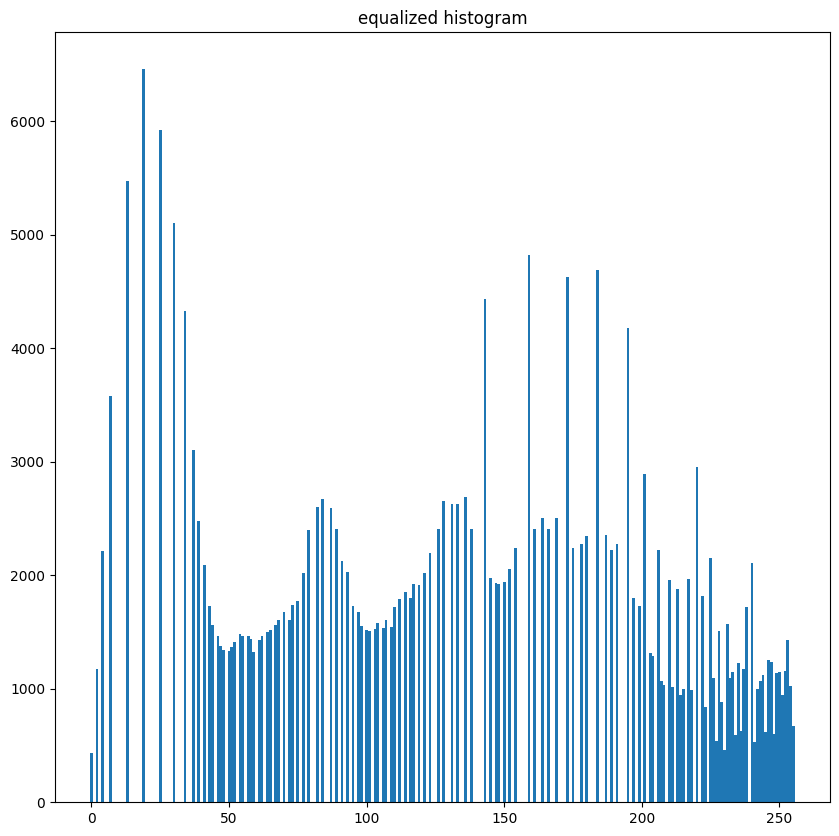

In [11]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()

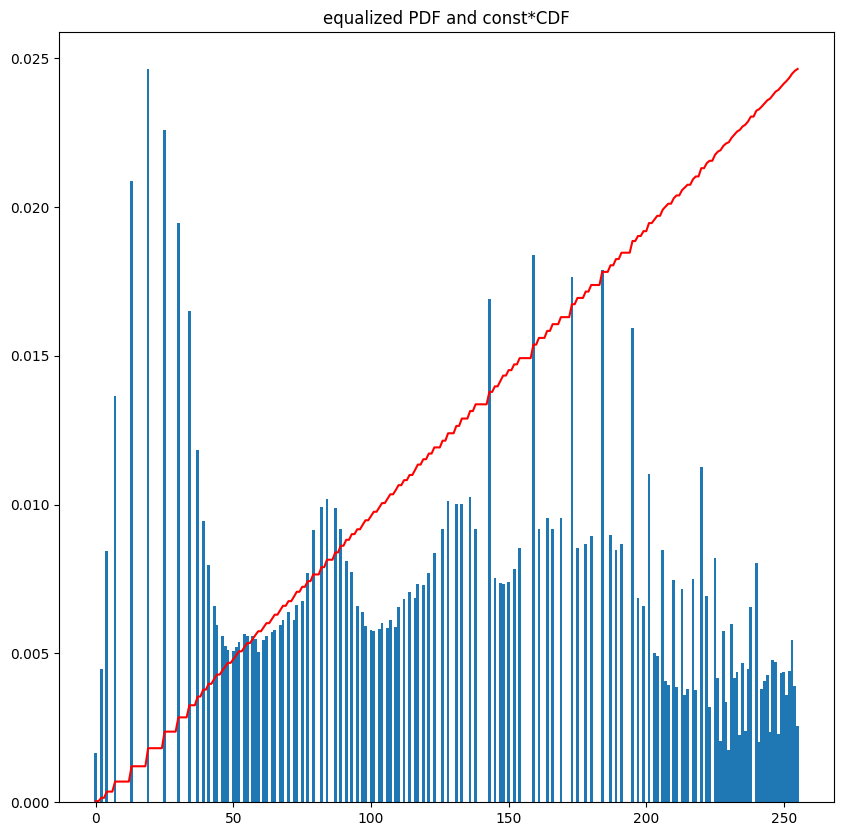

In [12]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()

## cv2 histogram equalization function


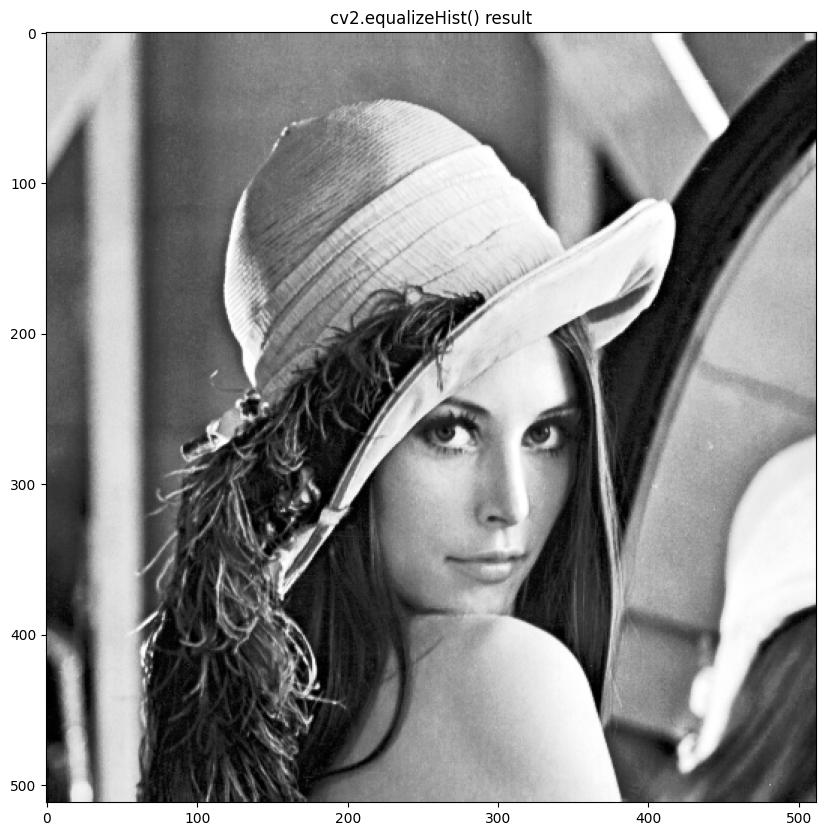

In [13]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()